# World's Top Billionaires 2018

<p> 2,212 billionaires, collectively worth $9.1 trillion.</p>

<p> capitalism’s global conquest continues as entrepreneurs around the globe mint fortunes in everything from cryptocurrencies to telecom to bridal dresses. Forbes has pinned down a record 2,212 billionaires from 72 countries and territories including the first ever from Hungary and Zimbabwe. This elite group is worth \$9.1 trillion, up 18% since last year. Their average net worth is a record \$4.1 billion. Americans lead the way with a record 587 billionaires, followed by mainland China with 373. Centi-billionaire Jeff Bezos secures the list’s top spot for the first time, becoming the only person to appear in the Forbes ranks with a 12-figure fortune. Bezos’s fortune leapt more than \$39 billion, the list’s biggest one-year gain ever. </p>

In [29]:
import numpy as np
import pandas as pd
import pandas.util

In [30]:
forbes = pd.read_csv('reviews_static.csv', names = ['Rank', 'Name', 'Net Worth', 'Age', 'Source', 'Country'])

forbes_realtime = pd.read_csv('reviews_realtime.csv', names = ['Rank', 'Name', 'Net Worth', 'Age', 'Source', 'Country'])

forbes_women = pd.read_csv('reviews_static_women.csv', names = ['Rank', 'Name', 'Net Worth', 'Age', 'Source', 'Country'])

In [31]:
#creating data frame for current net worth
realtime = forbes_realtime[['Name','Net Worth']]

#merging dataframe
forbes_data = pd.merge(forbes, realtime,how = 'left', on = 'Name')

#cleaning NA values
forbes_data['Age'] = forbes_data['Age'].fillna(forbes_data['Age'].median())
forbes_data['Net Worth_y'] = forbes_data['Net Worth_y'].fillna(0)

#creating new column "Change"
forbes_data['Change'] = forbes_data['Net Worth_y']- forbes_data['Net Worth_x']

In [32]:
# changing float into integar
forbes_data['Age'] = list(map(lambda x: int(x), forbes_data['Age']))
forbes_data['Rank'] = list(map(lambda x: int(x), forbes_data['Rank']))

In [33]:
#creating women data frame, so i can merge that into main data frame to create Gender column
women = forbes_women['Name']

#Creating new column "Gender" in main data frame
forbes_data['Gender'] = forbes_data['Name'].isin(women)
forbes_data['Gender'].replace([True,False],['F','M'],inplace = True)

In [34]:
#checking final data frame
forbes_data.head(10)

,Rank,Name,Net Worth_x,Age,Source,Country,Net Worth_y,Change,Gender
0,1,Jeff Bezos,112.0,54,Amazon,United States,147.3,35.3,M
1,2,Bill Gates,90.0,62,Microsoft,United States,95.9,5.9,M
2,3,Warren Buffett,84.0,88,Berkshire Hathaway,United States,85.1,1.1,M
3,4,Bernard Arnault,72.0,69,LVMH,France,71.2,-0.8,M
4,5,Mark Zuckerberg,71.0,34,Facebook,United States,57.6,-13.4,M
5,6,Amancio Ortega,70.0,82,Zara,Spain,62.5,-7.5,M
6,7,Carlos Slim Helu,67.1,78,telecom,Mexico,60.8,-6.3,M
7,8,Charles Koch,60.0,82,Koch Industries,United States,51.6,-8.4,M
8,8,David Koch,60.0,78,Koch Industries,United States,51.6,-8.4,M
9,10,Larry Ellison,58.5,74,software,United States,57.9,-0.6,M


In [35]:
#Checking Null values (No NA values)
np.sum(forbes_data.isnull())

Rank           0
Name           0
Net Worth_x    0
Age            0
Source         0
Country        0
Net Worth_y    0
Change         0
Gender         0
dtype: int64

In [36]:
%matplotlib inline

In [37]:
#import matplotlib for plotting graph
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Text(0.5,1,'Number of billionaires by country')

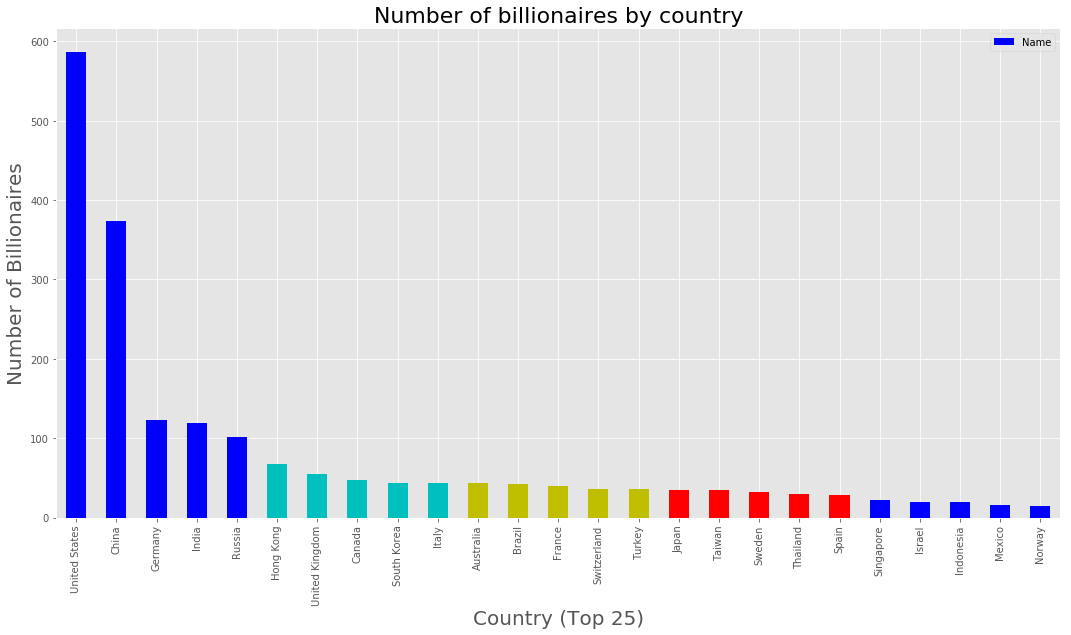

In [38]:
#GRAPH 1
#group by country 
B_by_country = forbes_data.groupby('Country')[['Name']].count()

#plot bar Graph
B_by_country.sort_values(by= 'Name', ascending = False).head(25).plot(kind= 'bar', figsize = (18,9),color = 'bbbbbcccccyyyyyrrrrr')
plt.xlabel('Country (Top 25)',fontsize = 20)
plt.ylabel('Number of Billionaires',fontsize = 20)
plt.title('Number of billionaires by country', fontsize = 22)
# plt.savefig("figure1.png")

Text(0.5,1,'Number of Male & Female')

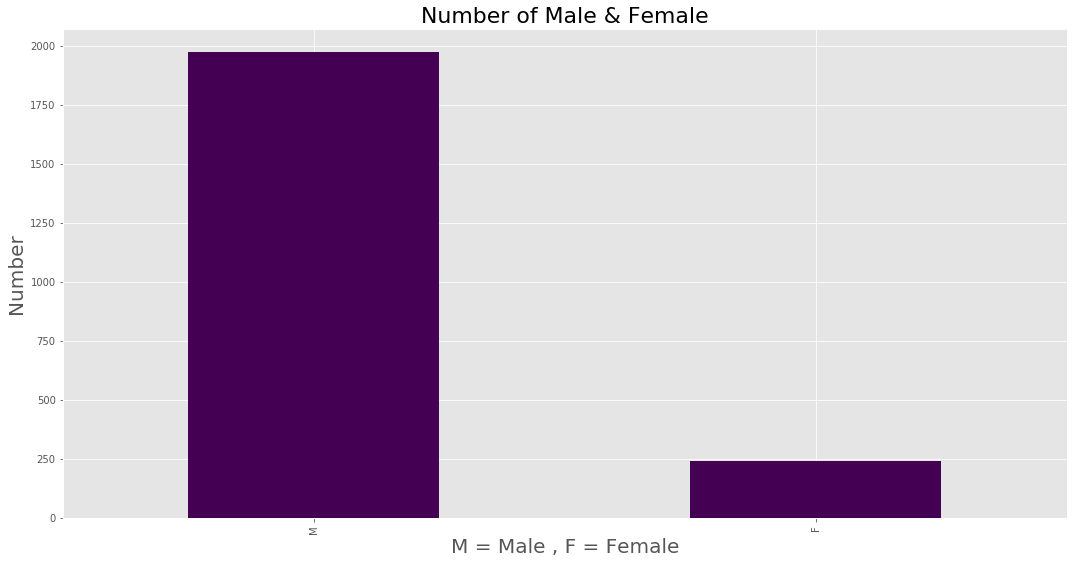

In [39]:
#GRAPH 2.1
#selecting Gender column and plotting graph
forbes_data['Gender'].value_counts().plot.bar(figsize=(18, 9), colormap = 'viridis' )
plt.xlabel('M = Male , F = Female',fontsize = 20)
plt.ylabel('Number',fontsize = 20)
plt.title('Number of Male & Female', fontsize = 22)
# plt.savefig("figure2.png")

Text(0,0.5,'Gender')

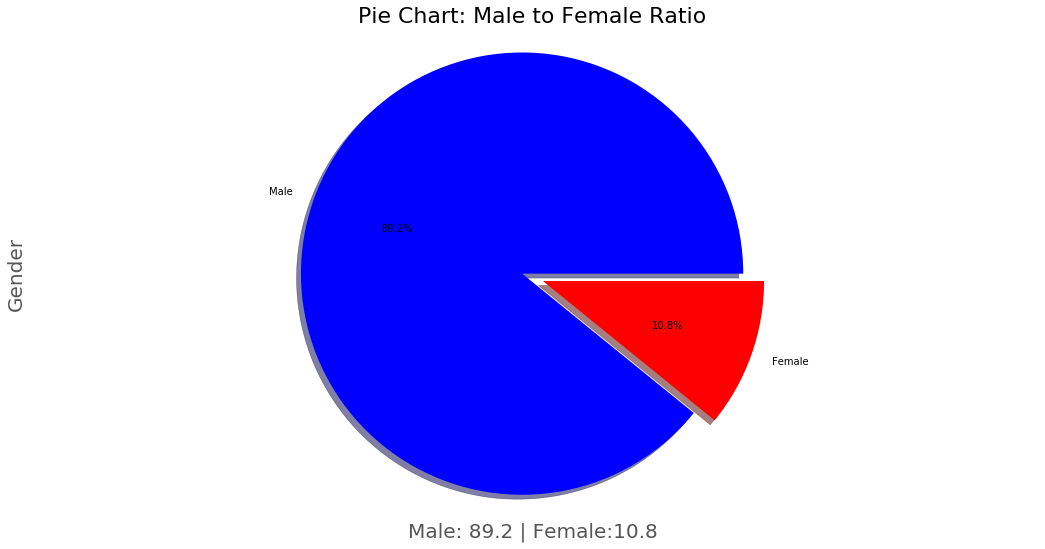

In [40]:
#GRAPH 2.2
#selecting Gender column and plotting graph
forbes_data['Gender'].value_counts().plot.pie(figsize = (18,9),autopct='%1.1f%%',shadow=True,\
                                              explode = (0,0.1),labels =('Male', 'Female'),colors = 'br',).axis('equal')
plt.xlabel('Male: 89.2 | Female:10.8', fontsize = 20)
plt.title('Pie Chart: Male to Female Ratio', fontsize=22)
plt.ylabel('Gender', fontsize = 20)
# plt.savefig("figure3.png")

Text(0.5,1,'Bar plot for popular source of Income ')

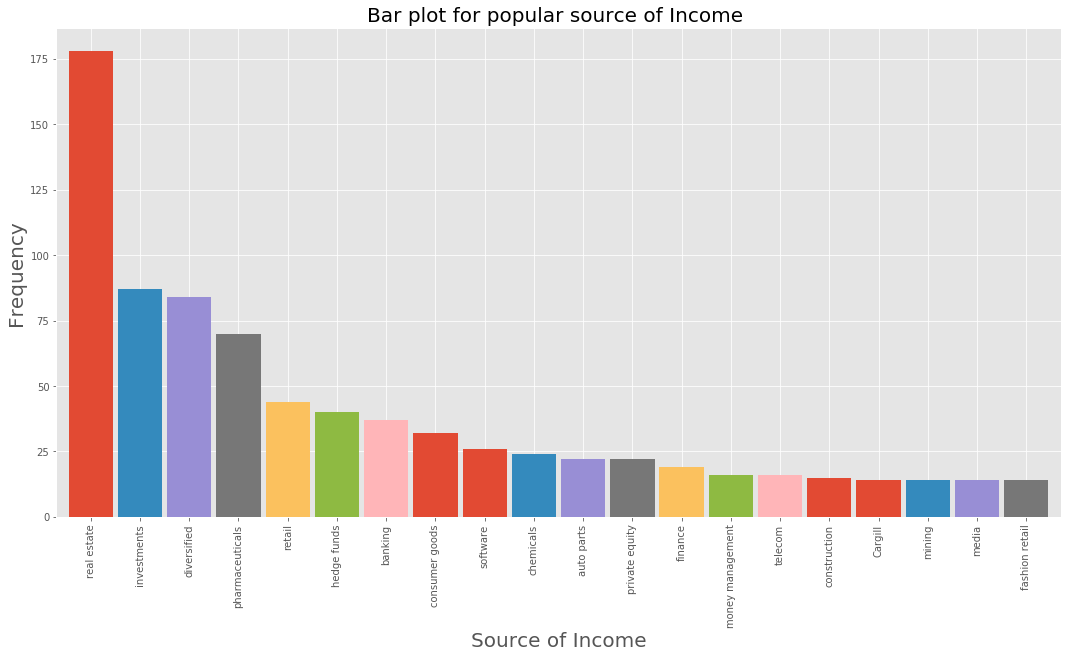

In [41]:
#GRAPH 3
#selecting Age column and plotting graph
popular_source = forbes_data.groupby('Source')['Source'].count()
popular_source.sort_values(ascending = False).head(20).plot.bar(figsize = (18,9), width = .9)
plt.xlabel('Source of Income',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Bar plot for popular source of Income ', fontsize=20)
# plt.savefig("figure3.png")

Text(0.5,1,'Histogram of Age')

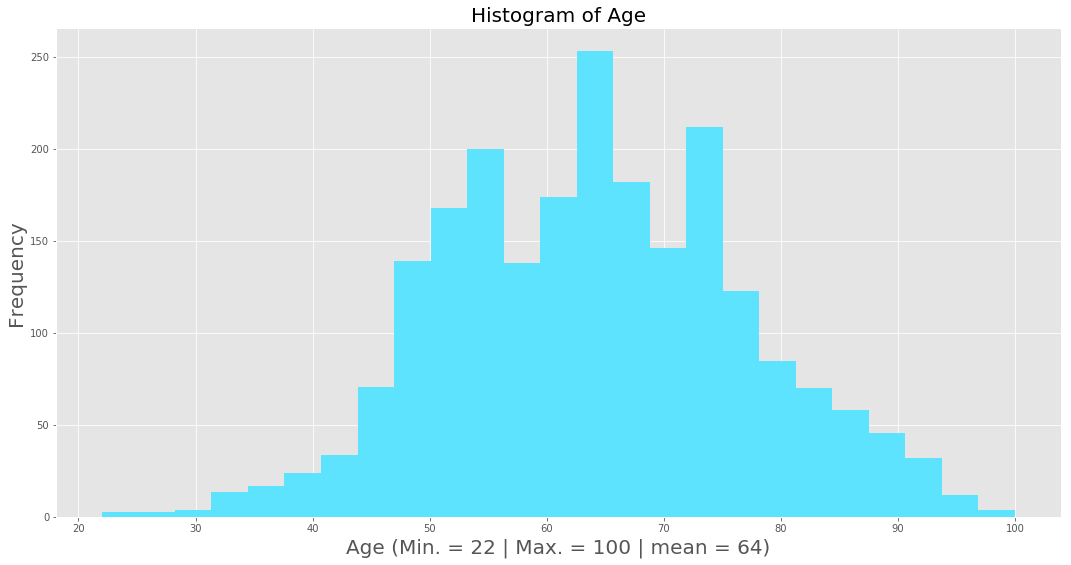

In [42]:
#GRAPH 4
#selecting Age column and plotting graph
forbes_data['Age'].plot(kind = 'hist', bins =25, color ="#5ee3ff",stacked = True, figsize = (18,9) )
plt.xlabel('Age (Min. = 22 | Max. = 100 | mean = 64)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Histogram of Age', fontsize=20)
# plt.savefig("figure4.png")

Text(0.5,1,'RICHEST PERSON FROM EACH COUNTRY')

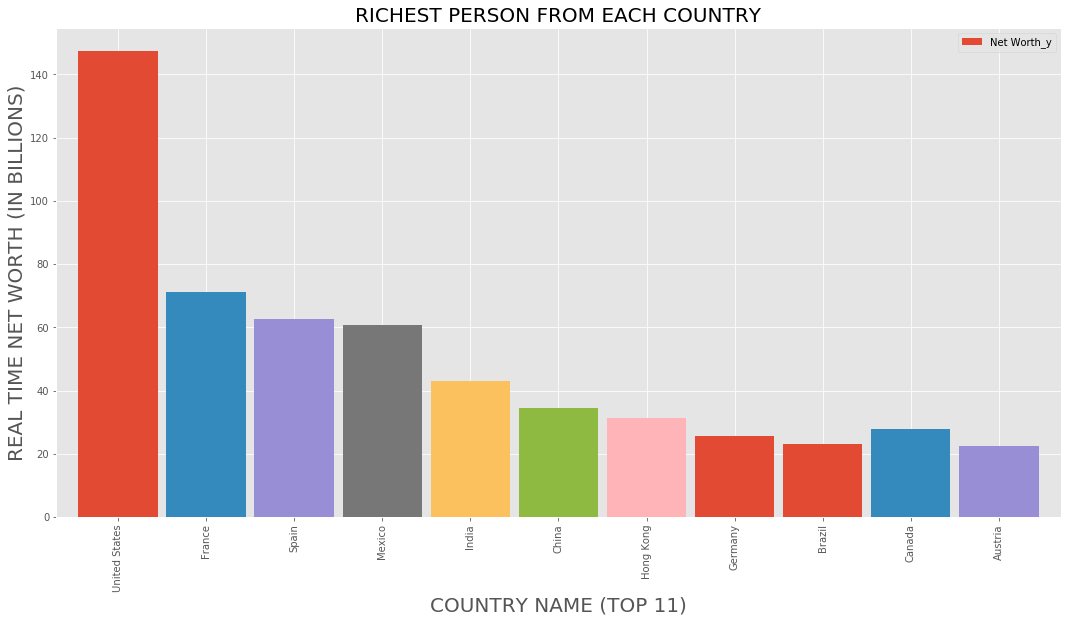

In [43]:
#GRAPH 5

#selecting Country and Net Worth_y column 
Temp= forbes_data.groupby('Country')[['Net Worth_y']].agg('max').reset_index()

#making a data frame by one richest person from each country
B_per_country = pd.merge(forbes_data, Temp, how = 'inner', on = ["Country", "Net Worth_y"])

#plotting graph
B_per_country.head(11).plot(kind ='bar',x ='Country', y = 'Net Worth_y', figsize = (18,9), width = .9)
plt.xlabel('COUNTRY NAME (TOP 11)',fontsize=20)
plt.ylabel('REAL TIME NET WORTH (IN BILLIONS)',fontsize=20)
plt.title('RICHEST PERSON FROM EACH COUNTRY', fontsize=20)
# plt.savefig("figure5.png")

C:\Users\patel\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5,1,'CHANGE IN NET WORTH')

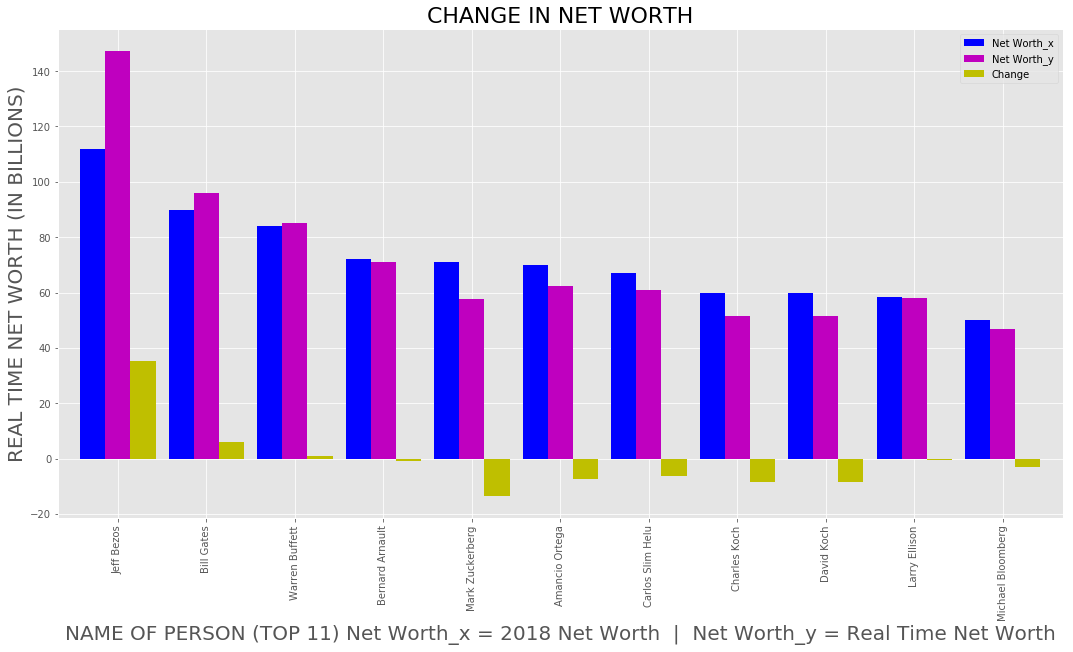

In [44]:
#GRAPH 6
#plotting graph for change in net_worth and real time net_worth
forbes_data.head(11).plot(figsize = (18,9),x = 'Name',y=["Net Worth_x", "Net Worth_y", "Change"], kind="bar", width= .85, colors = 'bmy')
plt.xlabel('NAME OF PERSON (TOP 11) Net Worth_x = 2018 Net Worth  |  Net Worth_y = Real Time Net Worth',fontsize=20)
plt.ylabel('REAL TIME NET WORTH (IN BILLIONS)',fontsize=20)
plt.title('CHANGE IN NET WORTH', fontsize=22)
# plt.savefig("figure6.png")

Text(0.5,1,'Bar Plot: Total money by country')

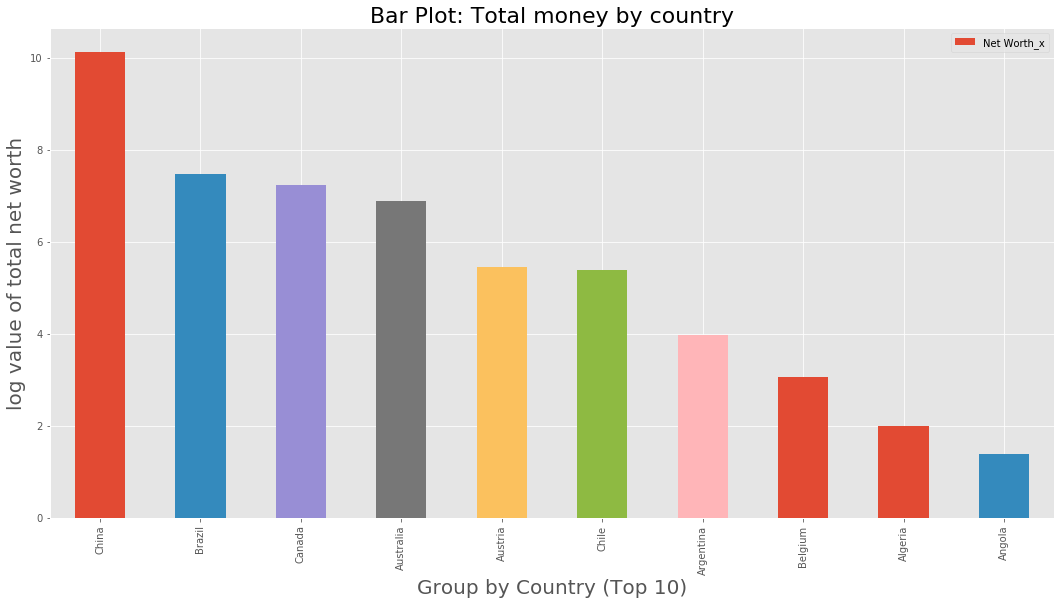

In [45]:
#GRAPH 7
# plotting graph for total net worth for each country
total_money = forbes_data.groupby('Country')[['Net Worth_x']].agg('sum').reset_index()

#taking log of total net_worth
total_money['Net Worth_x'] = np.log2(total_money['Net Worth_x'])

#plotting graph
total_money.head(10).sort_values(by = 'Net Worth_x', ascending = False).plot.bar(x = 'Country', y = 'Net Worth_x',figsize = (18,9),xlim = 20)
plt.xlabel('Group by Country (Top 10)', fontsize = 20)
plt.ylabel('log value of total net worth', fontsize = 20)
plt.title('Bar Plot: Total money by country', fontsize=22)
# plt.savefig("figure7.png")